In [1]:
import os
from PIL import Image
from torch.utils.data import Dataset
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from torch.utils.data.dataset import random_split
import cv2

(-0.5, 255.5, 255.5, -0.5)

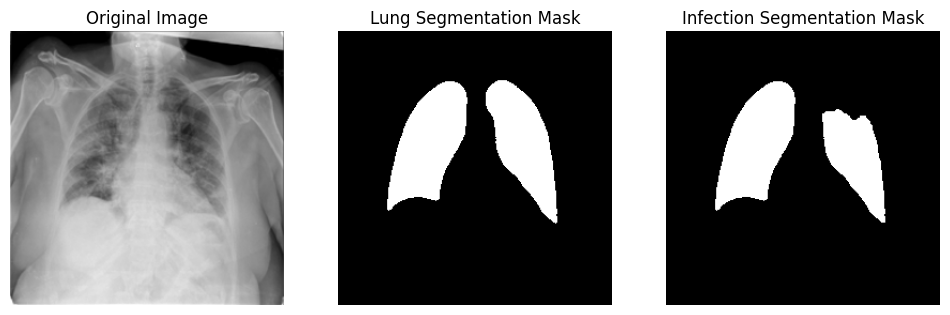

In [2]:
img_path = "/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Train/COVID-19/images/covid_1.png"
infection_mask_path = "/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Train/COVID-19/infection masks/covid_1.png"
lung_mask_path = "/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Train/COVID-19/lung masks/covid_1.png"

image1 = cv2.imread(img_path)
image2 = cv2.imread(infection_mask_path)
image3 = cv2.imread(lung_mask_path)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Display the first image
axes[0].imshow(image1)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Hide axes for cleaner visualization

# Display the second image (grayscale)
axes[1].imshow(image3, cmap='gray')
axes[1].set_title('Lung Segmentation Mask')
axes[1].axis('off')

# Display the third image with bounding box (adapt based on your bounding box creation)
axes[2].imshow(image2)
axes[2].set_title('Infection Segmentation Mask')
axes[2].axis('off')


In [42]:
def contour2yolo(contours):
    yolo_annotations = []
    class_index = 0
    #for Infection segemntation data
    #0: Normal
    #1: COVID-19
    #2: Non-COVID
    for contour in contours:
        x_coor = []
        y_coor = []
#         print("here: ", len(contour))
        for point in contour:
            x_coor.append(point[0][0])
            y_coor.append(point[0][1])
#         print("x_coor", len(x_coor), len(y_coor))
        x_coor = [x/256 for x in x_coor]
#         print("after: ", len(x_coor))
        y_coor = [y/256 for y in y_coor]
        yolo_annotation = f"{class_index} {' '.join(map(str, x_coor))} {' '.join(map(str, y_coor))}"
        yolo_annotations.append(yolo_annotation)
    return yolo_annotations        

In [44]:
os.makedirs('/kaggle/working/to')

In [30]:
!rm -rf /kaggle/working/*

In [43]:
import os
path = "/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data"
for root, _, files in os.walk("/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Val/Normal/infection masks"):
    for file in files:
        p
        infec_path = os.path.join(root, file)
        infec_mask = cv2.imread(infec_path)
        im_gr = cv2.cvtColor(infec_mask, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(im_gr, 127, 255, 0)
        contours, hierarchy_ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        yolo_annotations = contour2yolo(contours)
        file_txt = f"/kaggle/working/to/{file.replace('.png','.txt')}"
        with open(file_txt, "a") as f:
            for annotation in yolo_annotations:
                f.write(annotation + "\n")

In [48]:
file_txt = f"/kaggle/working/to/{file.replace('.png','.txt')}"
print(file_txt)
with open(file_txt, "a") as f:
    print(file_txt)
    for annotation in yolo_annotations:
        f.write(annotation + "\n")

/kaggle/working/to/Normal (10261).txt
/kaggle/working/to/Normal (10261).txt


In [49]:
print(file)

Normal (10261).png


In [51]:
for root, _, files in os.walk("/kaggle/input/covidqu/Infection Segmentation Data/Infection Segmentation Data/Val/Non-COVID/infection masks"):
    for file in files:
        print(file)

non_COVID (11184).png
non_COVID (4957).png
non_COVID (5020).png
non_COVID (4953).png
non_COVID (4917).png
non_COVID (4922).png
non_COVID (4942).png
non_COVID (4992).png
non_COVID (5027).png
non_COVID (11122).png
non_COVID (11172).png
non_COVID (11179).png
non_COVID (11135).png
non_COVID (4925).png
non_COVID (4943).png
non_COVID (4920).png
non_COVID (4909).png
non_COVID (5021).png
non_COVID (11154).png
non_COVID (4916).png
non_COVID (11131).png
non_COVID (4977).png
non_COVID (4948).png
non_COVID (11181).png
non_COVID (5032).png
non_COVID (4894).png
non_COVID (4966).png
non_COVID (11190).png
non_COVID (11142).png
non_COVID (4886).png
non_COVID (4911).png
non_COVID (11146).png
non_COVID (4984).png
non_COVID (11157).png
non_COVID (4899).png
non_COVID (4964).png
non_COVID (4901).png
non_COVID (11139).png
non_COVID (11176).png
non_COVID (11147).png
non_COVID (4908).png
non_COVID (11163).png
non_COVID (11193).png
non_COVID (11138).png
non_COVID (4983).png
non_COVID (4976).png
non_COVID (4900)

In [5]:
im_gr = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(im_gr, 127, 255, 0)

In [6]:
contours, hierarchy_ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

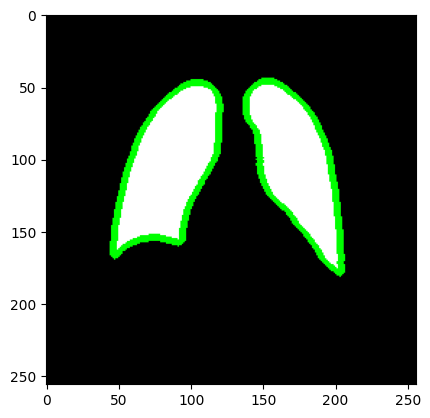

In [30]:
z = cv2.drawContours(image3,contours, -1, (0,255,0), 3)
plt.imshow(z)

In [7]:
for e in contour2yolo(contours):
    print(e)

0 0.390625 0.38671875 0.37890625 0.375 0.37109375 0.3671875 0.36328125 0.3515625 0.34765625 0.3359375 0.33203125 0.2890625 0.2890625 0.28515625 0.28515625 0.27734375 0.27734375 0.26953125 0.26953125 0.26171875 0.26171875 0.2578125 0.2578125 0.25390625 0.25390625 0.25 0.25 0.24609375 0.24609375 0.2421875 0.2421875 0.23828125 0.23828125 0.234375 0.234375 0.23046875 0.23046875 0.2265625 0.2265625 0.22265625 0.22265625 0.21875 0.21875 0.21484375 0.21484375 0.2109375 0.2109375 0.20703125 0.20703125 0.203125 0.203125 0.19921875 0.19921875 0.1953125 0.1953125 0.19140625 0.19140625 0.1875 0.1875 0.18359375 0.18359375 0.1796875 0.1796875 0.18359375 0.1875 0.19140625 0.1953125 0.1953125 0.20703125 0.2109375 0.21875 0.22265625 0.2265625 0.23046875 0.234375 0.2421875 0.24609375 0.25 0.25390625 0.2734375 0.27734375 0.3046875 0.30859375 0.3203125 0.32421875 0.3359375 0.33984375 0.3515625 0.35546875 0.359375 0.36328125 0.3671875 0.3671875 0.37109375 0.37109375 0.375 0.375 0.37890625 0.37890625 0.3828

In [50]:
for contour in contours:
    print(contour)

146
130
